# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('/content/foodhub_order (1).csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
#shape of the dataset
df.shape

(1898, 9)

#### Observations: The data set has 1,898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Data types 4 columns are integer and 4 columns are string and 1 columns is float. For the rating column it should be integer(numeric values) the data type is wrong.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Check if there is any missing values in each column.
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:There are no missing values in the data frame.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Check the statistical summaries of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum food preparation time is 20 minutes.

The average food preparation time is 27.37 minutes.

The maximum food preparation time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Check the value counts of the rating column
df.value_counts('rating')

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: 736 orders were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
# Check the number of unique order IDs
df["order_id"].nunique()

1898

There were 1898 unique order_id

In [11]:
# Check the number of unique Customer IDs
df["customer_id"].nunique()

1200

There were 1200 unique Customer_id

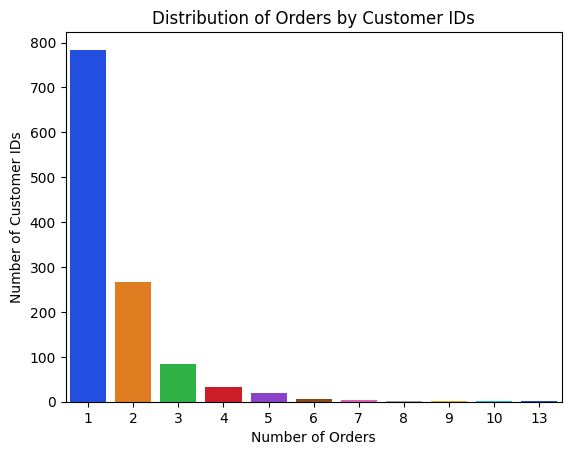

In [52]:
# check the orders by customer Id

data = df["customer_id"].value_counts().value_counts(ascending=True)


sns.barplot(x=data.index, y=data, hue=data.index, palette="bright", legend=False);
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customer IDs")
plt.title("Distribution of Orders by Customer IDs")
plt.show()

OBSERVATION:Most of the customer IDs made less than 5 orders.
The maximum number of orders made from an account was 13 orders.


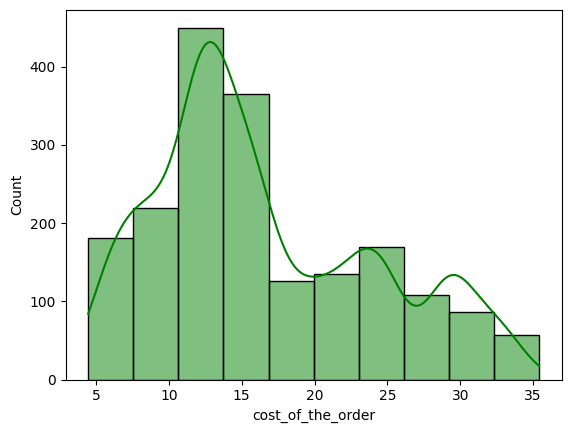

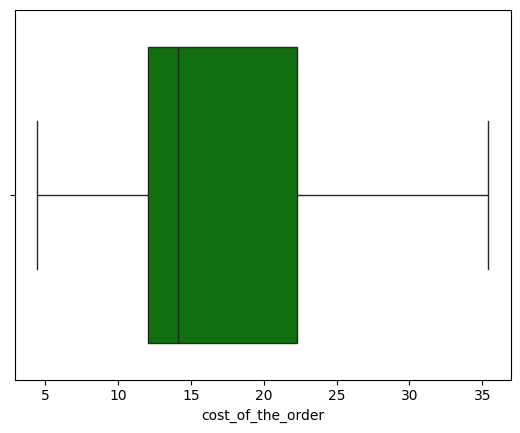

In [13]:
#Cost of the order
sns.histplot(data = df, x='cost_of_the_order', bins = 10, stat = 'count', kde = True,color="green");
plt.show()
sns.boxplot(data = df, x='cost_of_the_order',color="green")
plt.show();

Oservations:
Most of the orders cost less than 25.I did not find any outliers.

RESTAUARANT NAMES

In [14]:
df["restaurant_name"].nunique()

178

There were 178 unique restaurant names.

Top 10 Restaurants:

In [15]:
df["restaurant_name"].value_counts().head(10)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


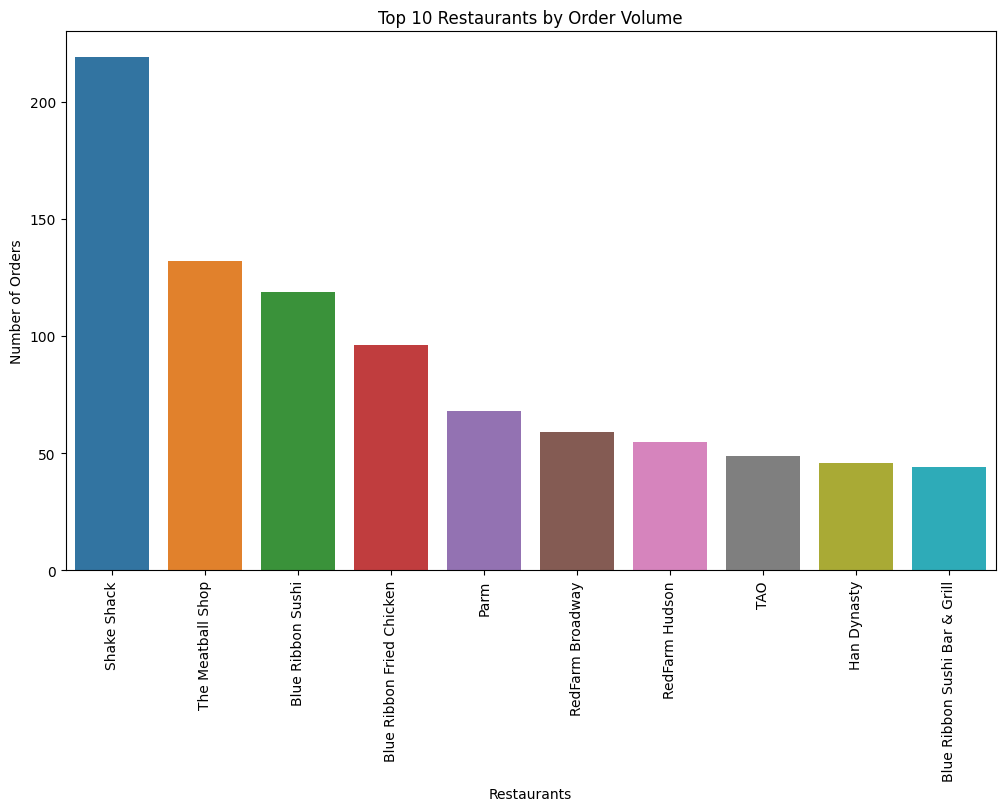

In [16]:
# Using barplots to show the top 10 restaurants based on the number of orders they received.
figsize=(12,7)
fig, ax = plt.subplots(figsize=figsize)
data=df["restaurant_name"].value_counts().head(10)
sns.barplot(x=data.index, y=data, hue=data.index, palette="tab10", ax=ax, legend=False);
plt.title("Top 10 Restaurants by Order Volume")
plt.xlabel("Restaurants")
plt.xticks(rotation=90)
plt.ylabel("Number of Orders")
plt.show()

Observations:
Shakeshack has the highest order value.

Cuisine Type

In [17]:
# Show the unique number of unique cuisines made by the Restaurants.
df["cuisine_type"].nunique()

14

In [18]:
df["cuisine_type"].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


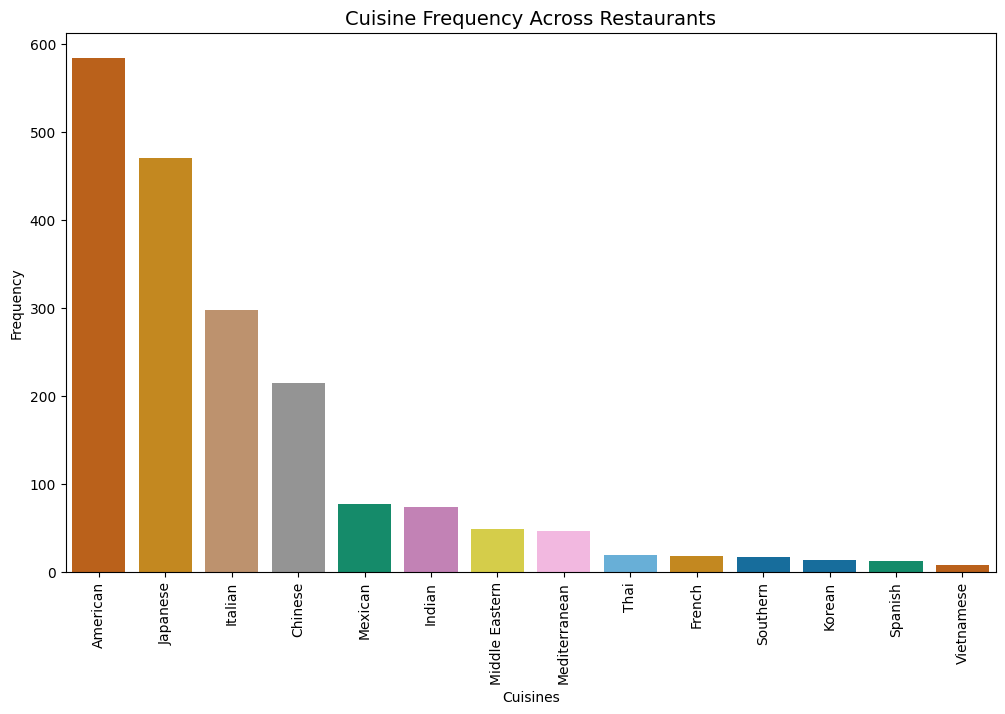

In [19]:
plt.figure(figsize = (12,7))
sns.countplot(data=df, x=df["cuisine_type"], order=df['cuisine_type'].value_counts().index, palette="colorblind", hue='cuisine_type', legend=False );
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Cuisines")
plt.title("Cuisine Frequency Across Restaurants", size=14)
plt.show()

Observation:
The most popular cuisine is American followed by Japanese

Rating

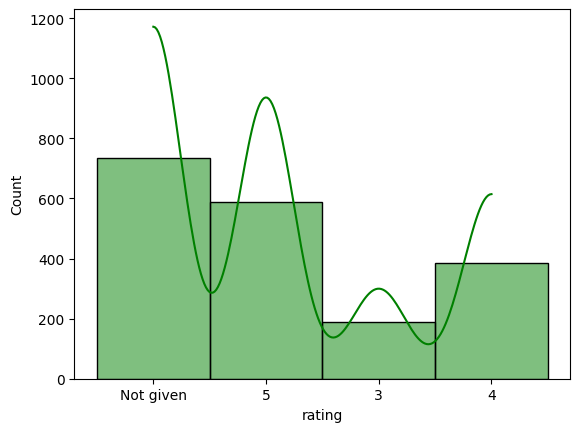

In [20]:
top5df= df['rating']
sns.histplot(x=top5df, bins = 4,stat = 'count',kde = True,color="green")
plt.show()

Observation

*   The most rated restaurant got 5
*  most of the customers did not give rating



Delivery Time

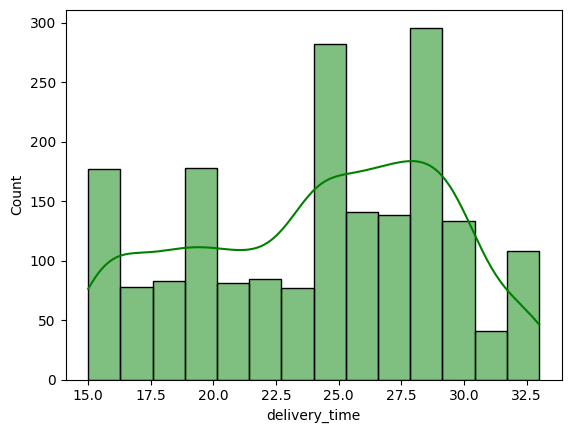

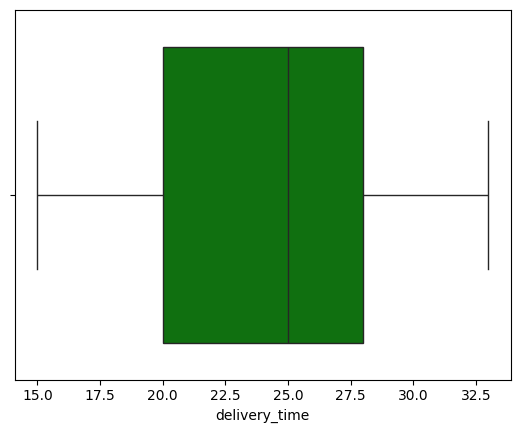

In [21]:
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,color="green")

plt.show()
sns.boxplot(data = df, x='delivery_time',color="green")

plt.show()

Observation: median delivery time is 25 minutes and it is left skewed.

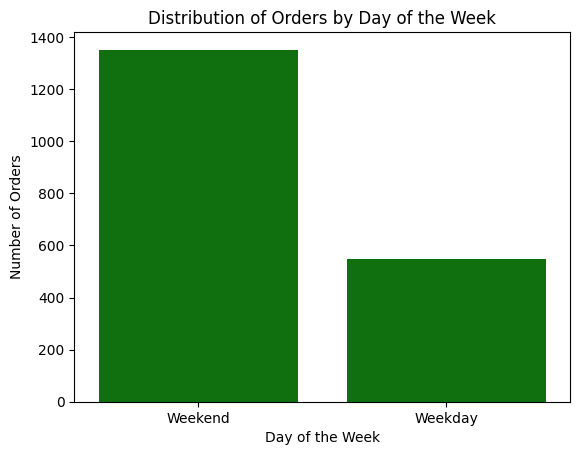

In [51]:
# Orders by day of the week and weekend comparison
sns.countplot(data=df, x="day_of_the_week",
              color="green");
plt.title("Distribution of Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()

Observation:
We observed that maximum number of orders made on Weekend.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
#returns counts of all orders associated with the top-five most ordered restaurant
df.restaurant_name.value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [24]:
# as group by
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index().head()

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:The top 5 restaurants by order id are shake shack,The meatball shop,Blue Ribbon Sushi,Blue Ribbon Fried chicken,Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
#most popular weekend orders
data=df[df.day_of_the_week=='Weekend']
data.cuisine_type.value_counts().head(5)

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:The most popular cuisine type is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# percentage of order more than 20 dollars
cost_of_order_count= df['cost_of_the_order'].count()
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
percentage_above20 = round((orders_above20/cost_of_order_count)*100,2)
percentage_above20


np.float64(29.24)

#### Observations:The percentage of order more than $20 is 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Mean order delivery time
round(df['delivery_time'].mean(),2)

np.float64(24.16)

#### Observations:The mean of the delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
df['customer_id'].unique()

array([337525, 358141,  66393, ...,  97838, 292602, 397537])

In [29]:
df['customer_id'].nunique()

1200

In [30]:
df['customer_id'].value_counts(normalize=True)

,proportion
customer_id,
52832,0.006849
47440,0.005269
83287,0.004742
250494,0.004215
259341,0.003688
...,...
143926,0.000527
89574,0.000527
157711,0.000527


In [31]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:After observation the top most customer_id is 52832, 2nd is 47440 and 3rd is 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


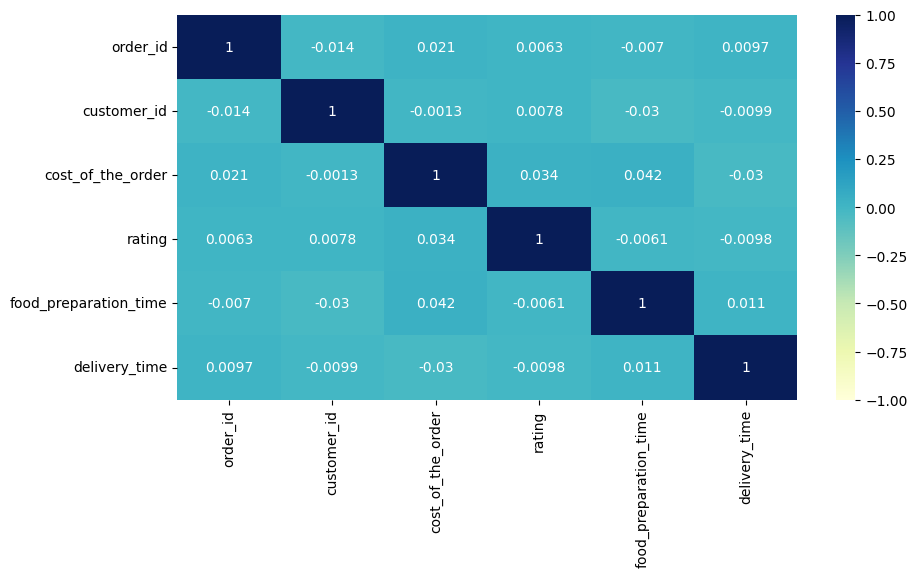

In [32]:
# Convert 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1);
plt.show()

Based on the data, the correlation between all of the variables are very weak.


In [33]:
#Cost of the Order_top 10
top10_type = df.groupby('cuisine_type').sum(numeric_only=True)[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)
top10_type

,cuisine_type,cost_of_the_order
0,American,9530.78
1,Japanese,7663.13
2,Italian,4892.77
3,Chinese,3505.62
4,Mexican,1303.85
5,Indian,1235.14
6,Middle Eastern,922.21
7,Mediterranean,711.84
8,Thai,364.95
9,French,356.29


<Figure size 2000x600 with 0 Axes>

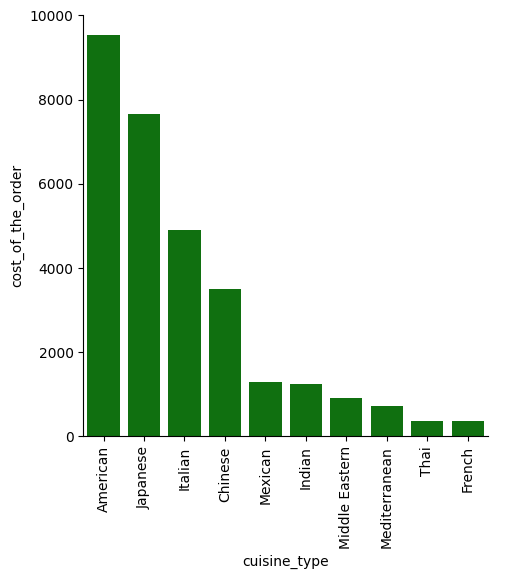

In [50]:
# Find most sell cuisine type
plt.figure(figsize=(20,6))
sns.catplot(data=top10_type,x= 'cuisine_type', y='cost_of_the_order',kind='bar',color="green")
plt.xticks(rotation=90);

Observations:
American Cuisine has the highest cost of the order

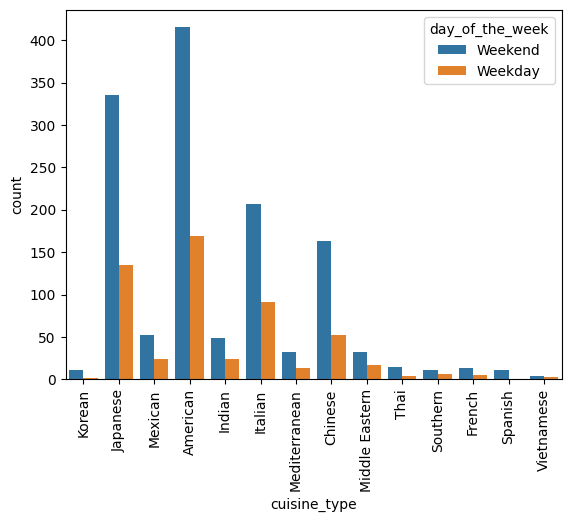

In [48]:
# Cost of the order weekend and weekday
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations:

American cuisine has the most order value during the weekend and weekday.


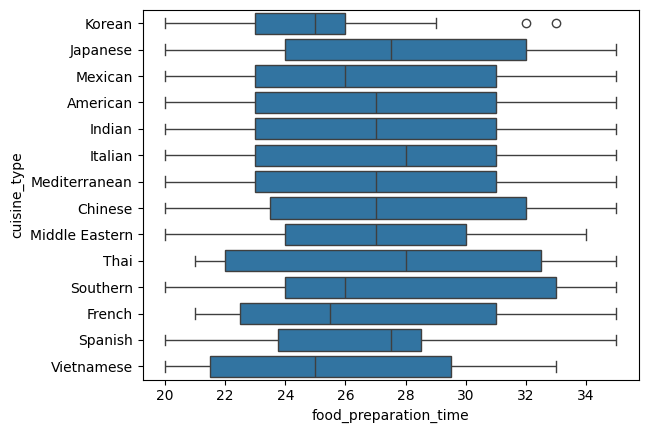

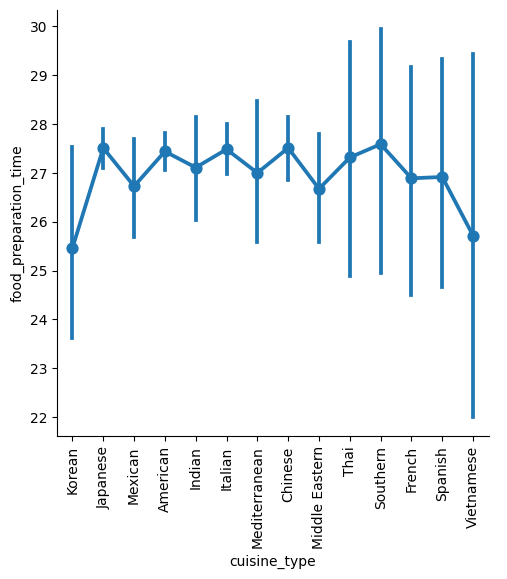

In [36]:
# Food preparation time
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

Observations:
Most cuisine types have more or less the same average preparation time although some have a
larger spread.


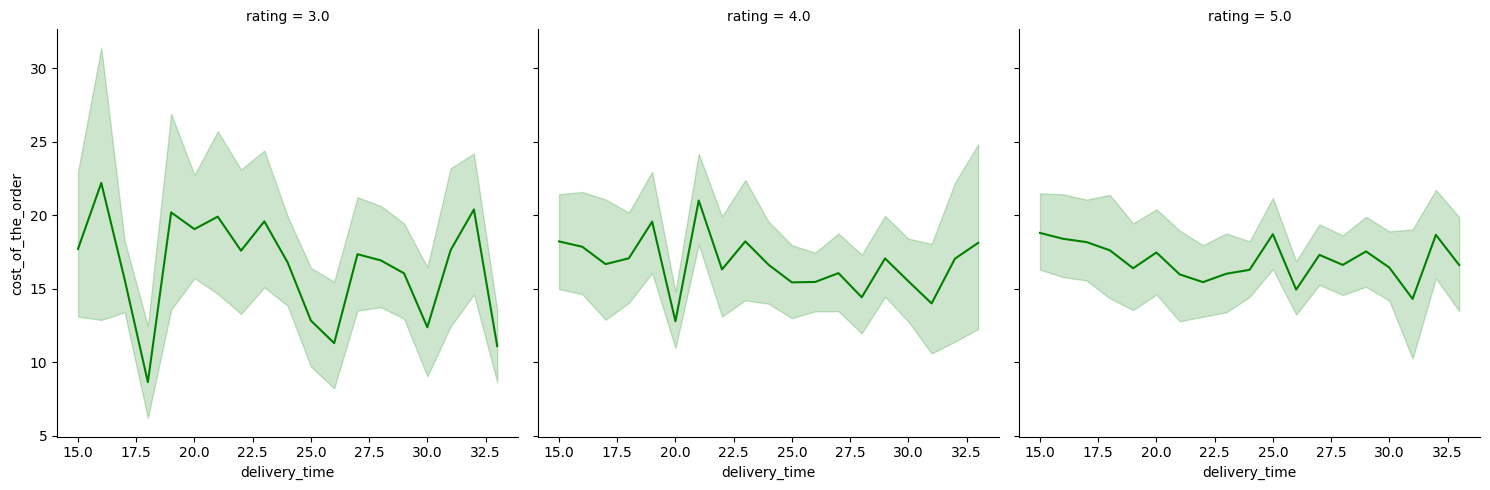

In [49]:
# Delivery time and food prep time comparison
sns.relplot(data=df,x='delivery_time',y='cost_of_the_order',col='rating',kind='line',color="green")
plt.show()

Observations: No real impact of cost and delivery/food prep time and ratings. There is a slight grouping of 3 rated orders that have a low cost and a fairly low delivery and food preparation time

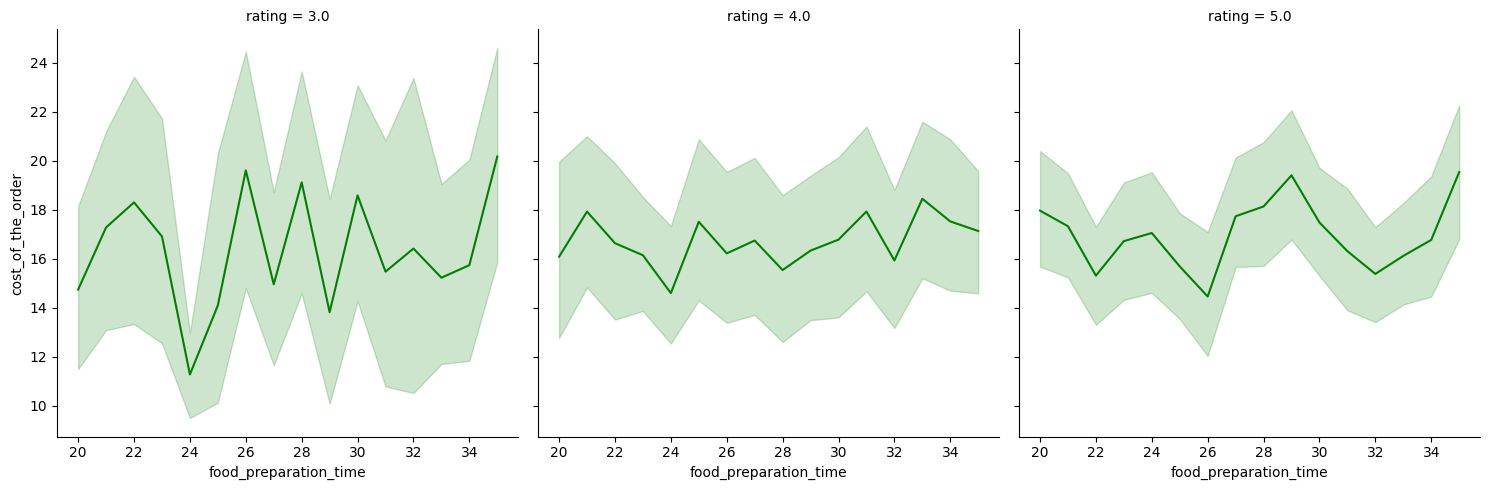

In [38]:
sns.relplot(data=df,x='food_preparation_time',y='cost_of_the_order',col='rating',kind='line',color="green")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [39]:
# Filter out orders that were not rated (NaN values in 'rating' column)
df_rated = df[df['rating'].notna()].copy()

# Group by restaurant_name and calculate rating count and average rating
restaurant_stats = df_rated.groupby('restaurant_name')['rating'].agg(
    rating_count='count',
    average_rating='mean'
).reset_index()

# Filter restaurants based on the criteria
qualified_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['average_rating'] > 4)
]

# Display the qualified restaurants
qualified_restaurants

,restaurant_name,rating_count,average_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:

*   Only 4 Restaurants had more than 50 ratings
    Shake Shack restaurant had the highest number of ratings. (133)
Of the 4 restaurants which had more than 50 ratings, all of them had a average rating of more than 4.
The Meatball Shop had the highest average rating of 4.512.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [41]:
# Writing a function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24,6.3050
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30,0.8955
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26,2.4660
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26,1.0770


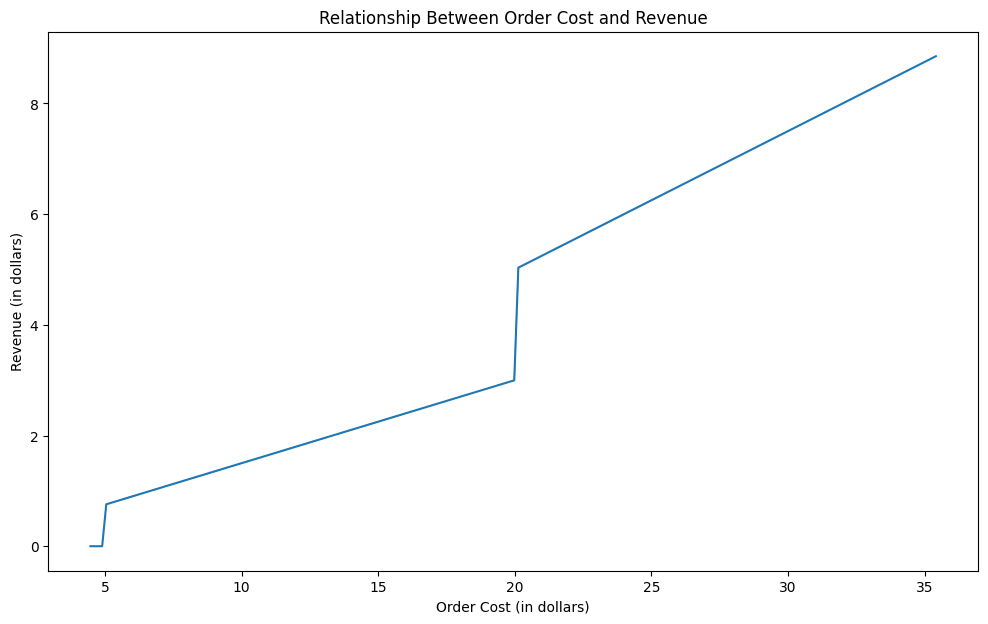

In [42]:
# Show the relationship between revenue and cost of the order.
plt.figure(figsize=(12,7))
sns.lineplot(x="cost_of_the_order", y="Revenue", data=df)
plt.title("Relationship Between Order Cost and Revenue")
plt.xlabel("Order Cost (in dollars)")
plt.ylabel("Revenue (in dollars)")
plt.show()

In [43]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() #
print('The net revenue is around {} dollars'.format(round(total_rev, 2)) )

The net revenue is around 6166.3 dollars


#### Observations:The net revenue generated is around 6166.3 dollars.
There is a positive correlation between revenue and the cost of the order such that an increase in the cost of the order results to an increase in revenue generated.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
round(len(df[df.total_time>60])/len(df)*100,1)

10.5

#### Observations:Only 200 of the total orders took more than 60 minutes to prepare translating into 10.5% of the total orders.
Most of the orders take a total of less than 60mins.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [45]:
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [47]:
Average_delivery_time=df.groupby(by=['day_of_the_week'])['delivery_time']
Average_delivery_time.mean().round()

,delivery_time
day_of_the_week,
Weekday,28.0
Weekend,22.0


#### Observations:

*  The average or mean delivery time for the weekday is 28.0 minutes
*   The average or mean delivery time for the weekend is 22.0 minutes
*   Hence the weekend delivery time is less than the weekday delivery time




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
  I noticed 736 out of 1898 customers did not give rating.American cuisine is high demand followed by japanese cyuisine. Most of the orders made on weekends.Most of the orders cost less than 20$.
  Shake Shack leading, followed by Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and then Parm.



### Recommendations:

Customers should involve give ratings that way the restaurants get feedback.The food hub should provide more offers and discounts on weekdays so that more orders will happen on weekdays.Restaurant with a low number of orders should look into increasing the quality of food and introduce new varieties of cuisines to increase the number of orders to give customers a variety to choose from.Only 4 cuisines had more than 200 orders overall. Thus, Foodhub app should consider using ads, incentives and discounts to attract customers to the other cuisines to increase their demand and popularity.  

---